In [1]:
from tensorflow.keras.applications.vgg16 import VGG16

conv_base = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (150, 150, 3)
)
conv_base.summary()

58892288/58889256 [==============================] - 11s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_____________________________________________________________

In [2]:
# feature extraction withou data augmentation
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = 'C:\\Workspace\\python\\Data_Science\\dataA\\분반(A반)\\cats_and_dogs_small\\cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale = 1. / 255)
batch_size = 20

In [7]:
def extract_feature(dir, sample_count):
    features = np.zeros(shape = (sample_count, 4, 4, 512))
    labels = np.zeros(shape = (sample_count))
    generator = datagen.flow_from_directory(
        dir,
        target_size = (150, 150),
        batch_size = batch_size,
        class_mode = 'binary'
    )
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i+1)*batch_size] = features_batch
        labels[i*batch_size : (i+1)*batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_feature(train_dir, 2000)
validation_features, validation_labels = extract_feature(validation_dir, 1000)
test_features, test_labels = extract_feature(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [10]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(Dense(256, activation = 'relu', input_dim = 4 * 4 * 512))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = optimizers.RMSprop(learning_rate = 2e-5),
              loss = 'binary_crossentropy', metrics = ['acc']
)
history = model.fit(
    train_features, train_labels, epochs = 30, batch_size = 20, validation_data = (validation_features, validation_labels)
)

model.save('C:\\Workspace\\python\\Data_Science\\dataA\\분반(A반)\\cats_and_dogs_small\\models\\cats_and_dogs_small_3.h5')

Epoch 1/30
100/100 [==============================] - 3s 22ms/step - loss: 0.5956 - acc: 0.6865 - val_loss: 0.3996 - val_acc: 0.8700
Epoch 2/30
100/100 [==============================] - 2s 18ms/step - loss: 0.4316 - acc: 0.8095 - val_loss: 0.3270 - val_acc: 0.8930
Epoch 3/30
100/100 [==============================] - 2s 19ms/step - loss: 0.3629 - acc: 0.8390 - val_loss: 0.2861 - val_acc: 0.9060
Epoch 4/30
100/100 [==============================] - 2s 21ms/step - loss: 0.3198 - acc: 0.8640 - val_loss: 0.3040 - val_acc: 0.8860
Epoch 5/30
100/100 [==============================] - 2s 21ms/step - loss: 0.2934 - acc: 0.8845 - val_loss: 0.2329 - val_acc: 0.9200
Epoch 6/30
100/100 [==============================] - 2s 21ms/step - loss: 0.2738 - acc: 0.8830 - val_loss: 0.2559 - val_acc: 0.9080
Epoch 7/30
100/100 [==============================] - 2s 21ms/step - loss: 0.2518 - acc: 0.8980 - val_loss: 0.2425 - val_acc: 0.9210
Epoch 8/30
100/100 [==============================] - 2s 21ms/step - 

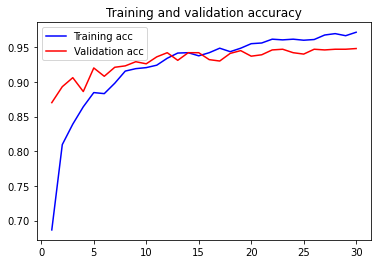

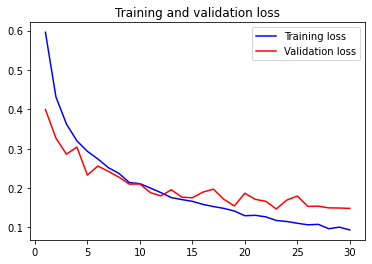

In [12]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'blue', label = 'Training acc')
plt.plot(epochs, val_acc, 'red', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'blue', label = 'Training loss')
plt.plot(epochs, val_loss, 'red', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [29]:
# feature extraction with data augmentation
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = models.Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
conv_base.trainable = True
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [30]:
print(f'conv_base를 동결하기 전 훈련되는 가중치 수 : {len(model.trainable_weights)}')
conv_base.trainable = False
print(f'conv_base를 동결한 후 훈련되는 가중치 수 : {len(model.trainable_weights)}')

conv_base를 동결하기 전 훈련되는 가중치 수 : 30
conv_base를 동결한 후 훈련되는 가중치 수 : 4


In [31]:
# 모델을 컴파일하고 훈련하기 전에 conv_base를 동결하는 것이 매우중요(훈련하는동안 가중치 업데이트를 막음)
# Keras에서는 trainable 속성을 False로 설정하여 네트워크 동결
# 변경사항을 적용하려면 모델을 컴파일 -> 컴파일 후에 trainable 속성을변경하면 반드시 모델을 다시 컴파일 할 것(하지않으면 변경사항이 미적용됨)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

train_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)
test_datagen = ImageDataGenerator(rescale = 1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 32, 
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [32]:
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(learning_rate = 2e-5), metrics = ['acc'])

In [34]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = validation_generator.n // validation_generator.batch_size,
    verbose = 2
)

model.save('C:\\Workspace\\python\\Data_Science\\dataA\\분반(A반)\\cats_and_dogs_small\\models\\cats_and_dogs_small_4.h5')

Epoch 1/30
62/62 - 336s - loss: 0.6094 - acc: 0.6702 - val_loss: 0.5054 - val_acc: 0.8059
Epoch 2/30
62/62 - 340s - loss: 0.5134 - acc: 0.7749 - val_loss: 0.3903 - val_acc: 0.8669
Epoch 3/30
62/62 - 333s - loss: 0.4590 - acc: 0.8023 - val_loss: 0.3383 - val_acc: 0.8755
Epoch 4/30
62/62 - 334s - loss: 0.4274 - acc: 0.8125 - val_loss: 0.2955 - val_acc: 0.8891
Epoch 5/30
62/62 - 332s - loss: 0.4061 - acc: 0.8201 - val_loss: 0.2882 - val_acc: 0.8947
Epoch 6/30
62/62 - 336s - loss: 0.3994 - acc: 0.8216 - val_loss: 0.2687 - val_acc: 0.8992
Epoch 7/30
62/62 - 336s - loss: 0.3730 - acc: 0.8506 - val_loss: 0.2806 - val_acc: 0.8967
Epoch 8/30
62/62 - 336s - loss: 0.3799 - acc: 0.8298 - val_loss: 0.3156 - val_acc: 0.8795
Epoch 9/30
62/62 - 333s - loss: 0.3613 - acc: 0.8349 - val_loss: 0.2664 - val_acc: 0.8997
Epoch 10/30
62/62 - 329s - loss: 0.3357 - acc: 0.8577 - val_loss: 0.2467 - val_acc: 0.9068
Epoch 11/30
62/62 - 316s - loss: 0.3335 - acc: 0.8633 - val_loss: 0.2823 - val_acc: 0.8916
Epoch 12

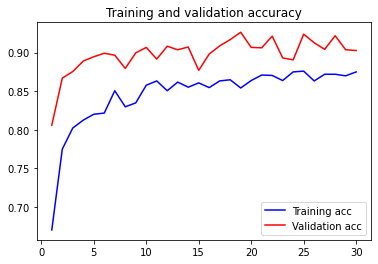

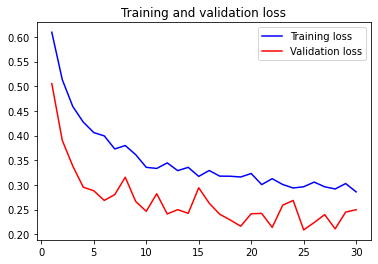

In [35]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'blue', label = 'Training acc')
plt.plot(epochs, val_acc, 'red', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'blue', label = 'Training loss')
plt.plot(epochs, val_loss, 'red', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Fine Tuning : 특성추출에 사용했던 동결모델의 상위 층 몇개를 동결에서 해제하고 모델에서 새로 추가한 층과 함께 연결
# Convet 하위층들은 좀 더 일반적이고, 재사용가능한 특성들(범용적인 특성들)을 인코딩
# 훈련해야할 파라미터가 많을 수록 과대적합의 가능성이 커짐.

# conv_base.trainable = True

# set_trainable = False
# for layer in conv_base.layers:
#     if layer.name == 'block5_conv1':
#         set_trainable = True
#     if set_trainable:
#         layer.trainable = True
#     else:
#         layer.trainable = False

# model.compile(
#     loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(learning_rate = 1e-5),
#     metrics['acc']
# )
# history = model.fit(
#     train_generator,
#     steps_per_epochs = train_generator.n // train_generator.batch_size,
#     epochs = 100,
#     validation_data = validation_generator.n // validation_generator.batch_size,
#     validation_steps = 50
# )